<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/Grocery-Store-Capstone-Project/blob/main/capstone_grocery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GROCERY SALE FORECASTING TIME SERIES**

![image 2](/content/drive/MyDrive/capstone/image 2.jpg)

## **INTRODUCTION**

Sales forecasting is the foundation of a business’s financial story. Once you have your sales forecast you can create profit and loss statements, cash flow statements and balance sheets, thus helping you set goals for your company. Proper forecasting also ensures you have the right stock at all times and leads to less wasted stock.

Having the skill to create a sales forecast will help you manage anything from a small business up to a large company, where you need to inform investors about your forecasts for a months, quarter or a year.

## **GOAL OF THE PROJECT**

The objective of this challenge is to create a model to forecast the number of products purchased per week per store over the next eight weeks, for grocery stores located in different areas in the same country. The solution to this challenge can be used by small chain stores to know how much stock to order per week and per month



## **General**
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## **Notebook overview**

This notebook is a guide to start practicing Data Analysis.

In [193]:
#SETUP GPU
import tensorflow as tf
device_list = tf.test.gpu_device_name
print("Tensorflow version:", tf.__version__)

if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is NOT available")
device_list()

Tensorflow version: 2.12.0
GPU is NOT available


''

# **Library Importation**

In [194]:
# Data handling
import pandas as pd
import numpy as np
from calendar import *

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from pandas import Series
!pip install pmdarima
# Time series models
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Feature Processing (Scikit-learn processing, etc. )
import sklearn
import scipy

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import  svm

# Evalution Metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GroupKFold, RepeatedKFold, KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# Other packages
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [195]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**
Here is the section to load the datasets (train, eval, test) and the additional files

In [196]:
# Load the datasets
df_tr = pd.read_csv('/content/drive/MyDrive/capstone/train 1.csv')
df_te = pd.read_csv('/content/drive/MyDrive/capstone/test 1.csv')
df_ho = pd.read_csv('/content/drive/MyDrive/capstone/holidays.csv')
df_st = pd.read_csv('/content/drive/MyDrive/capstone/stores.csv')
df_dat = pd.read_csv('/content/drive/MyDrive/capstone/dates.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Project objective
Forecast the number of products sold per store per week for a local grocery store

## Hypothesis

1. Null Hypothesis: Series is stationary.
2. Alternate Hypothesis: Series is non-stationary.





## Questions

1. Is the train dataset complete (has all the required dates)? Yes
2. Which dates have the lowest and highest sales for each year?
3. Are certain groups of stores selling more products?
4. Which category of products are the most purchased?
5. Which time of year are most purchases made?
6. Which shops recorded the highest sales and with what products?
7.	Are sales affected by holidays?
8.	What analysis can we get from the date and its extractable features?
9. Which product category was promoted most?
10. Which day, month, and year recorded the highest promotion?
11. Are product purchased affected by promotion?


## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

# variable definitions

1. Target: the total sales for a product category at a particular store at a given date
2. Stores_id: the unique store id
3. Category_id: the unique Product category id
4. Date: date in numerical representation
5. Onpromotion: gives the total number of items in a Product category that were being promoted at a store at a given date
6. Nbr_of_transactions: the total number of transactions happened at a store at a given date
7. year_weekofyear: the combination of the year and the week of the year, (year_weekofyear = year*100+week_of_year)
8. ID: the unique identifier for each row in the testing set: year_week_{year_weekofyear}_{store_id}_{Category_id}

In [197]:
# train dataset
print(df_tr.head())

# check the number of rows,columns and the dates for the train data
print(df_tr.info())

# Check train duplicates
print(df_tr.duplicated().sum())

# Check missing values in the train data set
print(df_tr.isna().sum())

print(df_tr.shape)

print(df_tr.describe())

print(df_tr.dtypes)

   date store_id  category_id  target  onpromotion  nbr_of_transactions
0   365  store_1  category_24     0.0            0                  0.0
1   365  store_1  category_21     0.0            0                  0.0
2   365  store_1  category_32     0.0            0                  0.0
3   365  store_1  category_18     0.0            0                  0.0
4   365  store_1  category_26     0.0            0                  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248884 entries, 0 to 2248883
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 int64  
 1   store_id             object 
 2   category_id          object 
 3   target               float64
 4   onpromotion          int64  
 5   nbr_of_transactions  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 102.9+ MB
None
0
date                   0
store_id               0
category_id            0
target                 0
onpromotion  

In [198]:
# test dataset
print(df_te.head())

# check the number of rows,columns and the dates for the train data
print(df_te.info())

# Check train duplicates
print(df_te.duplicated().sum())

# Check missing values in the train data set
print(df_te.isna().sum())

print(df_te.shape)

print(df_te.describe())

print(df_te.dtypes)

   date store_id  category_id  onpromotion
0  1627  store_1  category_24            0
1  1627  store_1  category_21            0
2  1627  store_1  category_32            0
3  1627  store_1  category_18           16
4  1627  store_1  category_26            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99792 entries, 0 to 99791
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         99792 non-null  int64 
 1   store_id     99792 non-null  object
 2   category_id  99792 non-null  object
 3   onpromotion  99792 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.0+ MB
None
0
date           0
store_id       0
category_id    0
onpromotion    0
dtype: int64
(99792, 4)
               date   onpromotion
count  99792.000000  99792.000000
mean    1654.500000      7.274892
std       16.163311     18.504041
min     1627.000000      0.000000
25%     1640.750000      0.000000
50%     1654.500000      0.000000
7

In [199]:
# stores dataset
print(df_st.head())

# check the number of rows,columns and the dates for the train data
print(df_st.info())

# Check train duplicates
print(df_st.duplicated().sum())

# Check missing values in the train data set
print(df_st.isna().sum())

print(df_st.shape)

print(df_st.describe())

print(df_st.dtypes)

  store_id  city  type  cluster
0  store_1     0     0        0
1  store_2     0     0        0
2  store_3     0     0        1
3  store_4     0     0        2
4  store_5     1     0        3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  54 non-null     object
 1   city      54 non-null     int64 
 2   type      54 non-null     int64 
 3   cluster   54 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB
None
0
store_id    0
city        0
type        0
cluster     0
dtype: int64
(54, 4)
            city       type    cluster
count  54.000000  54.000000  54.000000
mean    6.981481   1.592593   7.296296
std     6.945857   1.447425   4.700982
min     0.000000   0.000000   0.000000
25%     0.000000   0.000000   4.000000
50%     6.500000   2.000000   7.000000
75%    11.750000   2.000000  11.000000
max    21.000000   4.000000  16.

In [200]:
# holidays dataset
print(df_ho.head())

# check the number of rows,columns and the dates for the train data
print(df_ho.info())

# Check train duplicates
print(df_ho.duplicated().sum())

# Check missing values in the train data set
print(df_ho.isna().sum())

print(df_ho.shape)

print(df_ho.describe())

print(df_ho.dtypes)

   date  type
0     1     0
1     5     4
2    12     4
3    42     0
4    43     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    281 non-null    int64
 1   type    281 non-null    int64
dtypes: int64(2)
memory usage: 4.5 KB
None
17
date    0
type    0
dtype: int64
(281, 2)
              date        type
count   281.000000  281.000000
mean    901.896797    1.402135
std     461.359327    1.996031
min       1.000000    0.000000
25%     540.000000    0.000000
50%     934.000000    0.000000
75%    1237.000000    2.000000
max    1684.000000    5.000000
date    int64
type    int64
dtype: object


In [201]:
# dates dataset
print(df_dat.head())

# check the number of rows,columns and the dates for the train data
print(df_dat.info())

# Check train duplicates
print(df_dat.duplicated().sum())

# Check missing values in the train data set
print(df_dat.isna().sum())

print(df_dat.shape)

print(df_dat.describe())

print(df_dat.dtypes)

   date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  quarter  \
0   365     1      1           1          2          1           1        1   
1   366     1      1           2          3          2           1        1   
2   367     1      1           3          4          3           1        1   
3   368     1      1           4          5          4           1        1   
4   369     1      1           5          6          5           1        1   

   is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0            True         False              True           False   
1           False         False             False           False   
2           False         False             False           False   
3           False         False             False           False   
4           False         False             False           False   

   is_year_start  is_year_end  year_weekofyear  
0           True        False              101  
1          F

In [202]:
# assumption: year 1-4, 2018, 2019, 2020, 2021

year = {1:"2018", 2:"2019", 3:"2020", 4:"2021"}
df_dat["year"] = df_dat["year"].apply(lambda x: year[x])
df_dat["year"] = df_dat["year"].astype(int)
df_dat

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,2018,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,2018,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,2018,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,2018,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,2018,1,5,6,5,1,1,False,False,False,False,False,False,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,2021,8,11,4,223,32,3,False,False,False,False,False,False,432
1316,1681,2021,8,12,5,224,32,3,False,False,False,False,False,False,432
1317,1682,2021,8,13,6,225,32,3,False,False,False,False,False,False,432
1318,1683,2021,8,14,0,226,33,3,False,False,False,False,False,False,433


In [203]:
#create fulldate column from year, month, and day columns
df_dat['Date'] = pd.to_datetime(dict(year=df_dat.year, month=df_dat.month, day=df_dat.dayofmonth))


In [204]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
month = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df_dat["dayofweek"] = df_dat["dayofweek"].apply(lambda x: days[x])
df_dat["month"] = df_dat["month"].apply(lambda x: month[x])
df_dat

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,365,2018,Jan,1,Weds,1,1,1,True,False,True,False,True,False,101,2018-01-01
1,366,2018,Jan,2,Thurs,2,1,1,False,False,False,False,False,False,101,2018-01-02
2,367,2018,Jan,3,Fri,3,1,1,False,False,False,False,False,False,101,2018-01-03
3,368,2018,Jan,4,Sat,4,1,1,False,False,False,False,False,False,101,2018-01-04
4,369,2018,Jan,5,Sun,5,1,1,False,False,False,False,False,False,101,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,2021,Aug,11,Fri,223,32,3,False,False,False,False,False,False,432,2021-08-11
1316,1681,2021,Aug,12,Sat,224,32,3,False,False,False,False,False,False,432,2021-08-12
1317,1682,2021,Aug,13,Sun,225,32,3,False,False,False,False,False,False,432,2021-08-13
1318,1683,2021,Aug,14,Mon,226,33,3,False,False,False,False,False,False,433,2021-08-14


## **Merging Dataset**

### **Train dataset**

In [205]:
# merge train data with other data
df_t1 = pd.merge(df_tr, df_st, on="store_id")


In [206]:
# Merge the resulting data with the holiday
df_t2 = pd.merge(df_t1, df_ho, on="date", how="left")
df_t2

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type_x,cluster,type_y
0,365,store_1,category_24,0.000,0,0.0,0,0,0,0.0
1,365,store_1,category_21,0.000,0,0.0,0,0,0,0.0
2,365,store_1,category_32,0.000,0,0.0,0,0,0,0.0
3,365,store_1,category_18,0.000,0,0.0,0,0,0,0.0
4,365,store_1,category_26,0.000,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2288083,1626,store_9,category_23,539.725,0,2141.0,0,1,4,NaN
2288084,1626,store_9,category_20,84.177,0,2141.0,0,1,4,NaN
2288085,1626,store_9,category_15,1973.760,3,2141.0,0,1,4,NaN
2288086,1626,store_9,category_29,2.000,0,2141.0,0,1,4,NaN


In [207]:
df_t1.isna().sum()

date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
city                   0
type                   0
cluster                0
dtype: int64

In [208]:
df_t2.isna().sum()

date                         0
store_id                     0
category_id                  0
target                       0
onpromotion                  0
nbr_of_transactions          0
city                         0
type_x                       0
cluster                      0
type_y                 1899612
dtype: int64

In [209]:
df_train1 = pd.merge(df_t1, df_dat, on="date", how="left")
df_train1

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,365,store_1,category_24,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
1,365,store_1,category_21,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
2,365,store_1,category_32,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
3,365,store_1,category_18,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
4,365,store_1,category_26,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248880,1626,store_9,category_20,84.177,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248881,1626,store_9,category_15,1973.760,3,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248882,1626,store_9,category_29,2.000,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18


In [210]:
# assumption is all 0s in holiday data shows no holiday
df_train = df_train1.fillna(value=0)

In [211]:
# drop the date column from the data set
df_train.drop(columns="date", inplace=True)


In [212]:
df_train.isna().sum()

store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
city                   0
type                   0
cluster                0
year                   0
month                  0
dayofmonth             0
dayofweek              0
dayofyear              0
weekofyear             0
quarter                0
is_month_start         0
is_month_end           0
is_quarter_start       0
is_quarter_end         0
is_year_start          0
is_year_end            0
year_weekofyear        0
Date                   0
dtype: int64

### Test dataset

In [213]:
# merge test data with other data

merged1 = df_te.merge(df_dat, how = 'left', on=['date'])

merged = merged1.merge(df_st, how = 'left',
    on=['store_id'])

df_test = merged.merge(df_ho, how = 'left', on = ['date'])
df_test

,date,store_id,category_id,onpromotion,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,...,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date,city,type_x,cluster,type_y
0,1627,store_1,category_24,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
1,1627,store_1,category_21,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
2,1627,store_1,category_32,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
3,1627,store_1,category_18,16,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
4,1627,store_1,category_26,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105133,1682,store_9,category_23,0,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105134,1682,store_9,category_20,1,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105135,1682,store_9,category_15,7,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105136,1682,store_9,category_29,8,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN


In [214]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105138 entries, 0 to 105137
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              105138 non-null  int64         
 1   store_id          105138 non-null  object        
 2   category_id       105138 non-null  object        
 3   onpromotion       105138 non-null  int64         
 4   year              105138 non-null  int64         
 5   month             105138 non-null  object        
 6   dayofmonth        105138 non-null  int64         
 7   dayofweek         105138 non-null  object        
 8   dayofyear         105138 non-null  int64         
 9   weekofyear        105138 non-null  int64         
 10  quarter           105138 non-null  int64         
 11  is_month_start    105138 non-null  bool          
 12  is_month_end      105138 non-null  bool          
 13  is_quarter_start  105138 non-null  bool          
 14  is_q

In [215]:
df_test.isna().sum()

date                    0
store_id                0
category_id             0
onpromotion             0
year                    0
month                   0
dayofmonth              0
dayofweek               0
dayofyear               0
weekofyear              0
quarter                 0
is_month_start          0
is_month_end            0
is_quarter_start        0
is_quarter_end          0
is_year_start           0
is_year_end             0
year_weekofyear         0
Date                    0
city                    0
type_x                  0
cluster                 0
type_y              83754
dtype: int64

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

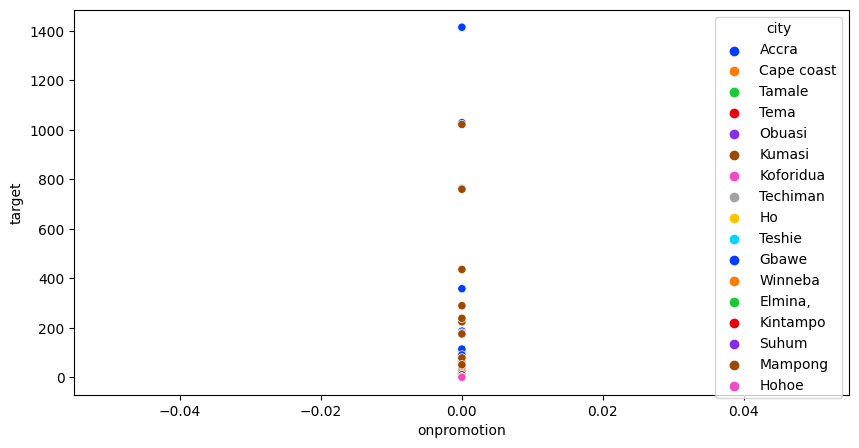

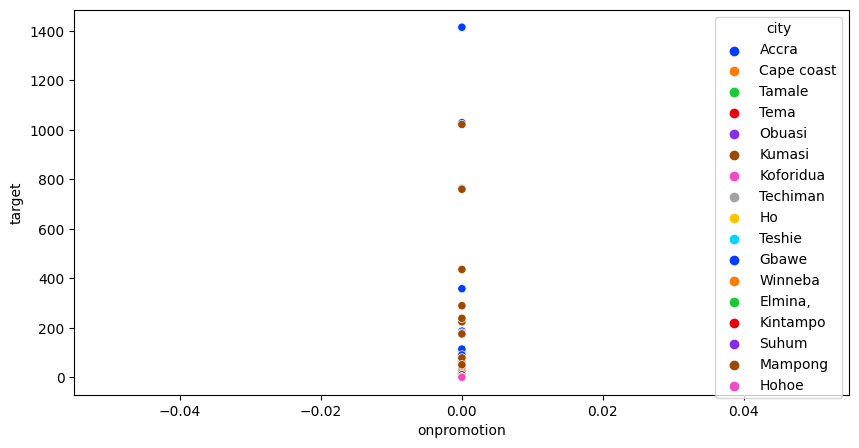

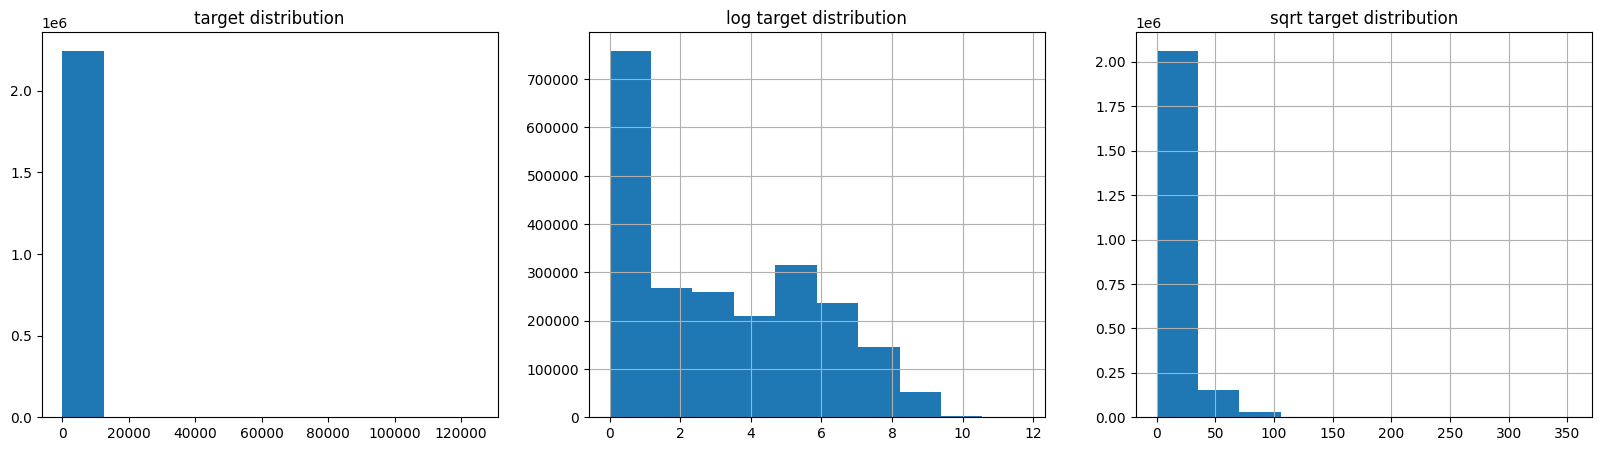

In [216]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.hist(data = df_train, x = 'target');

plt.title('target distribution')
plt.subplot(1, 3, 2)
np.log1p(df_train['target']).hist();

plt.title('log target distribution')
plt.subplot(1, 3, 3)
np.sqrt(df_train['target']).hist();
plt.title('sqrt target distribution');

In [217]:
# set date as index
df_train_copy = df_train.set_index("Date")

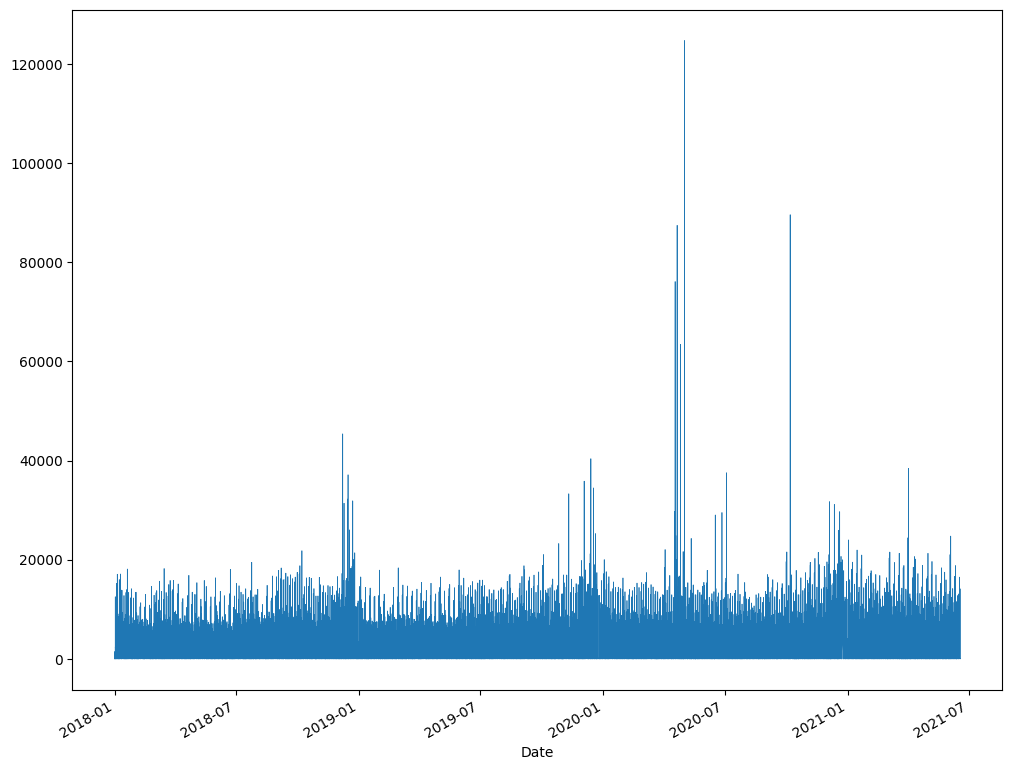

In [218]:
## Visualizing sales
plt.figure(figsize=(12,10))
df_train_copy["target"].plot(linewidth = 0.5)
plt.show()

## **Multivariate Analysis**




Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [219]:
# Code here
corr = df_train.corr()
corr

,target,onpromotion,nbr_of_transactions,city,type,cluster,year,dayofmonth,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
target,1.000000,0.435450,0.236932,-9.523934e-02,7.670046e-02,6.836286e-02,4.910990e-02,-1.187028e-02,2.160867e-02,1.872772e-02,2.080545e-02,6.271767e-03,3.626151e-03,-4.206229e-03,2.449693e-04,-1.853791e-02,6.338739e-03,5.321916e-02
onpromotion,0.435450,1.000000,0.054022,-1.488255e-02,1.781251e-03,2.506609e-03,1.676007e-01,3.094487e-03,3.457244e-02,2.959729e-02,3.153422e-02,-3.656004e-03,2.487347e-03,-6.465273e-03,1.293491e-03,-1.298547e-02,4.398856e-03,1.764088e-01
nbr_of_transactions,0.236932,0.054022,1.000000,-4.367530e-01,2.888395e-01,2.327518e-01,2.756568e-02,-5.378655e-03,4.533430e-02,2.553377e-02,3.684125e-02,-5.952812e-03,1.463999e-02,-3.776517e-02,1.159234e-02,-8.501621e-02,4.087418e-02,3.587470e-02
city,-0.095239,-0.014883,-0.436753,1.000000e+00,-5.706656e-02,1.515660e-01,2.516652e-11,-2.399184e-16,-7.890618e-15,-2.078580e-14,3.213296e-14,2.730094e-15,-1.641508e-15,2.913545e-16,-3.282032e-16,5.778586e-17,-3.944424e-16,8.978921e-15
type,0.076700,0.001781,0.288840,-5.706656e-02,1.000000e+00,7.224007e-01,1.434496e-11,-2.712843e-15,2.942149e-15,-5.361364e-15,1.565340e-14,1.561532e-15,-1.013518e-15,-6.071731e-16,-8.741301e-16,-5.638885e-17,-4.034206e-16,1.207599e-14
cluster,0.068363,0.002507,0.232752,1.515660e-01,7.224007e-01,1.000000e+00,2.047968e-11,-2.357838e-15,6.911570e-16,-8.886725e-15,1.795359e-14,1.972324e-15,-2.356980e-15,-2.038406e-16,-9.129523e-16,-4.351265e-17,-6.208878e-16,1.124402e-14
year,0.049110,0.167601,0.027566,2.516652e-11,1.434496e-11,2.047968e-11,1.000000e+00,-1.788515e-02,-2.101811e-01,-2.059253e-01,-2.128780e-01,3.108183e-03,-4.439190e-03,1.774266e-03,-1.147573e-02,1.278661e-02,-1.285081e-02,9.884838e-01
dayofmonth,-0.011870,0.003094,-0.005379,-2.399184e-16,-2.712843e-15,-2.357838e-15,-1.788515e-02,1.000000e+00,9.033322e-02,5.918679e-02,1.188063e-02,-3.085768e-01,3.088768e-01,-1.761470e-01,1.734038e-01,-9.377957e-02,8.553391e-02,-4.365795e-03
dayofyear,0.021609,0.034572,0.045334,-7.890618e-15,2.942149e-15,6.911570e-16,-2.101811e-01,9.033322e-02,1.000000e+00,9.665178e-01,9.684651e-01,-2.636715e-02,2.544130e-02,-4.581283e-02,4.608276e-02,-9.060308e-02,9.105371e-02,-6.431883e-02
weekofyear,0.018728,0.029597,0.025534,-2.078580e-14,-5.361364e-15,-8.886725e-15,-2.059253e-01,5.918679e-02,9.665178e-01,1.000000e+00,9.423454e-01,4.092345e-03,9.424712e-03,6.700149e-03,1.936329e-02,7.454366e-03,3.434105e-02,-6.592360e-02


<Axes: >

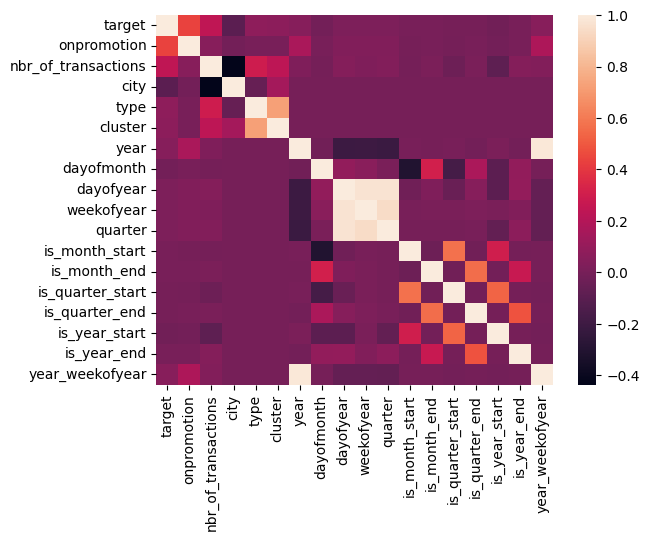

In [220]:
#visualize correlation

sns.heatmap(corr)

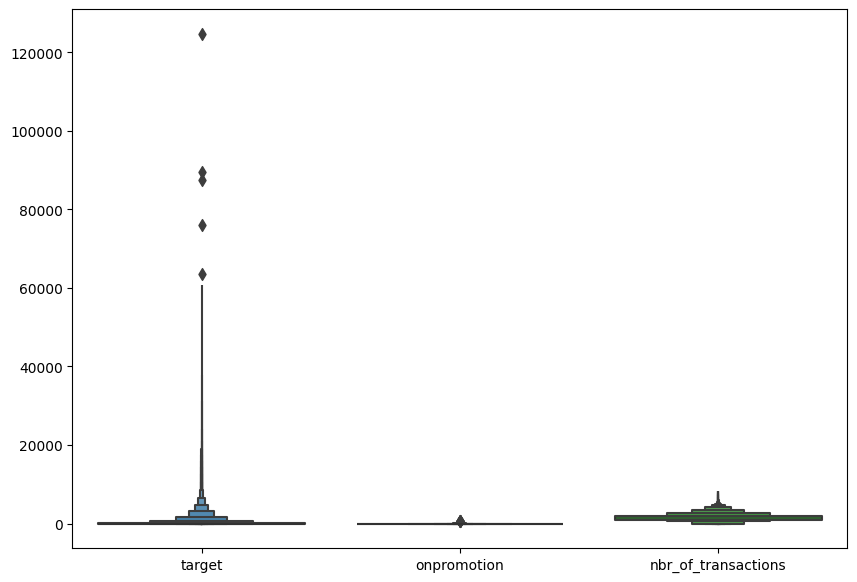

In [221]:
# check for outliers
num_feat = ["target", "onpromotion", "nbr_of_transactions"]
fig = plt.figure(figsize =(10, 7))
sns.boxenplot(data=df_train[num_feat])
plt.show()

# Hypothesis

### We can check stationarity using the following:

**ACF and PACF plots:** If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

**Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

**Augmented Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

**KPSS Test**

## KPSS Testing

In [222]:
kpss(df_train.target)

(65.85447067806625,
 0.01,
 600,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**p-value is 0.01(<0.05) meaning our series is non-stationary**

## QUESTIONS

### 1. Is the train dataset complete (has all the required dates)?

In [223]:
def get_missing_dates(df_train):

  col = df_train["Date"]

  missing_dates = (pd.date_range(



      start=col.min(), #start date

      end=col.max())   #end_date

      .difference(col))

  print(f"we have {len(missing_dates)} dates missing out of {len(col)}")

  return missing_dates

In [224]:
get_missing_dates(df_train)

we have 3 dates missing out of 2248884


DatetimeIndex(['2018-12-25', '2019-12-25', '2020-12-25'], dtype='datetime64[ns]', freq=None)

### 2. Which dates have the lowest and highest sales for each year?

In [225]:
min_sales = df_train.groupby(lambda x: df_train["Date"][x].year)["target"].idxmin()
sales_lowest = df_train.loc[min_sales]
sales_lowest

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,store_1,category_24,0.0,0,0.0,0,0,0,2018,Jan,...,1,1,True,False,True,False,True,False,101,2018-01-01
12012,store_1,category_24,0.0,0,0.0,0,0,0,2019,Jan,...,1,1,True,False,True,False,True,False,201,2019-01-01
24024,store_1,category_24,0.0,0,0.0,0,0,0,2020,Jan,...,53,1,True,False,True,False,True,False,253,2020-01-01
36069,store_1,category_24,0.0,0,0.0,0,0,0,2021,Jan,...,52,1,True,False,True,False,True,False,352,2021-01-01


In [226]:
max_sales = df_train.groupby(lambda x: df_train["Date"][x].year)["target"].idxmax()
sales_highest = df_train.loc[max_sales]
sales_highest

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
1177353,store_35,category_7,45361.000,3,624.0,14,2,7,2018,Dec,...,50,4,False,False,False,False,False,False,150,2018-12-08
1189563,store_35,category_7,40351.460,7,594.0,14,2,7,2019,Dec,...,51,4,False,False,False,False,False,False,251,2019-12-14
486168,store_2,category_7,124717.000,59,1905.0,0,0,0,2020,May,...,18,2,False,False,False,False,False,False,318,2020-05-02
2246322,store_9,category_7,38422.625,73,2245.0,0,1,4,2021,Apr,...,13,2,False,False,False,False,False,False,413,2021-04-02


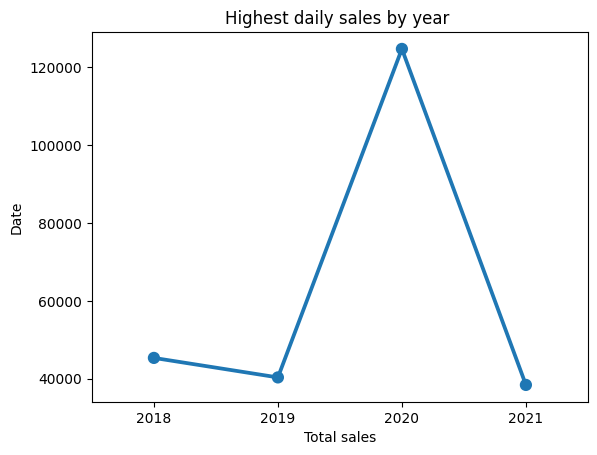

In [227]:
# Visualization


sns.pointplot(data=sales_highest, x="year", y="target")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()

### 3. Are certain groups of stores selling more products?

In [228]:
Stores_sales = df_train.groupby("store_id", as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
Stores_sales

,store_id,target
38,store_44,5.119602e+07
39,store_45,4.502962e+07
41,store_47,4.203455e+07
22,store_3,4.193445e+07
43,store_49,3.725139e+07
40,store_46,3.390839e+07
42,store_48,2.913866e+07
46,store_51,2.681253e+07
52,store_8,2.524399e+07
45,store_50,2.303979e+07


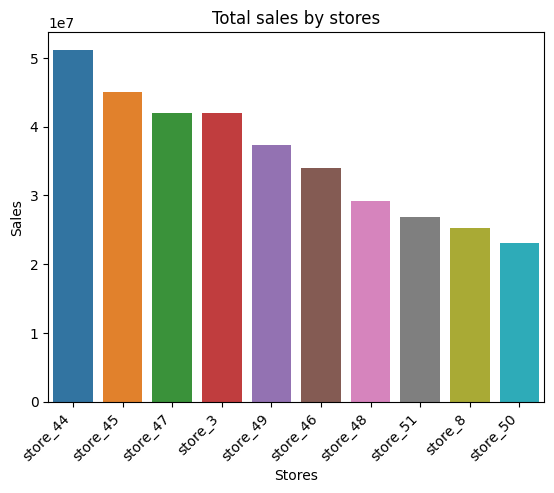

In [229]:
sns.barplot(data=Stores_sales, y="target", x="store_id")
plt.xlabel("Stores")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales")
plt.title("Total sales by stores")
plt.show()

### 4. Which category of products are the most purchased?

In [230]:
products_sales = df_train.groupby("category_id", as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
products_sales

,category_id,target
30,category_7,2.708197e+08
10,category_18,1.841306e+08
7,category_15,1.152757e+08
32,category_9,7.596166e+07
6,category_14,5.401186e+07
9,category_17,3.342890e+07
16,category_23,2.624444e+07
4,category_12,2.344414e+07
5,category_13,1.980174e+07
27,category_4,1.917761e+07


###  5. What analysis can we get from the date and its extractable features?
Which time of year are most purchases made?

<Axes: ylabel='target'>

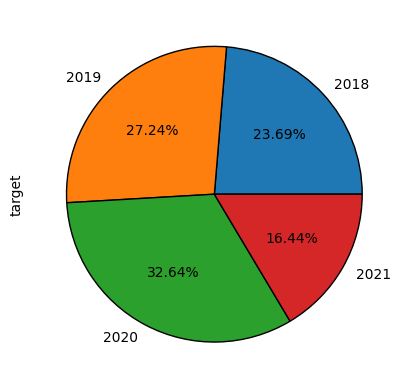

In [231]:
yearly_sales = df_train.groupby("year")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
yearly_sales

In [232]:
monthly_sales = df_train.groupby("month", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
monthly_sales

,month,target
7,Mar,8.579999e+07
4,Jan,8.411453e+07
8,May,8.280143e+07
2,Dec,8.122472e+07
0,Apr,7.967465e+07
6,Jun,7.345336e+07
3,Feb,7.097827e+07
10,Oct,6.830476e+07
9,Nov,6.797923e+07
11,Sep,6.568075e+07


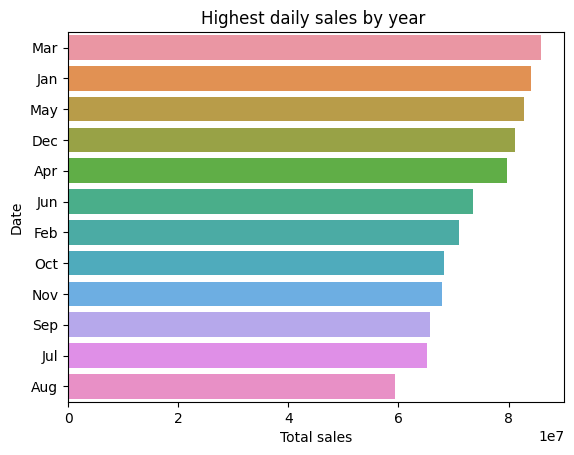

In [233]:
sns.barplot(data=monthly_sales, y="month", x="target")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()

In [234]:
#top 10 sales by month and year
t_sales = df_train.groupby(["month", "year"], as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
t_sales

,month,year,target
9,Dec,2020,2.964029e+07
8,Dec,2019,2.724398e+07
32,May,2021,2.691185e+07
28,Mar,2021,2.670402e+07
17,Jan,2021,2.632816e+07
2,Apr,2020,2.596303e+07
3,Apr,2021,2.589531e+07
31,May,2020,2.477943e+07
35,Nov,2020,2.464264e+07
7,Dec,2018,2.434045e+07


In [235]:
daily_sales = df_train.groupby("dayofweek", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
daily_sales

,dayofweek,target
3,Sun,1.629419e+08
2,Sat,1.530822e+08
1,Mon,1.218983e+08
6,Weds,1.186063e+08
0,Fri,1.146094e+08
5,Tues,1.133877e+08
4,Thurs,9.988139e+07


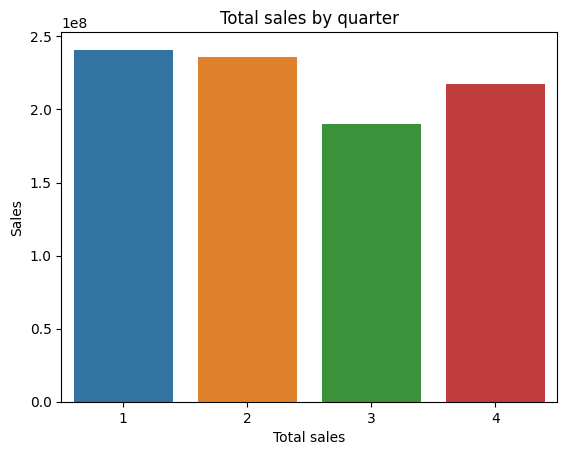

In [236]:
quarterly_sales = df_train.groupby("quarter", as_index=False)["target"].sum()
sns.barplot(data=quarterly_sales, x="quarter", y="target")
plt.ylabel("Sales")
plt.xlabel("Total sales")
plt.title("Total sales by quarter")
plt.show()

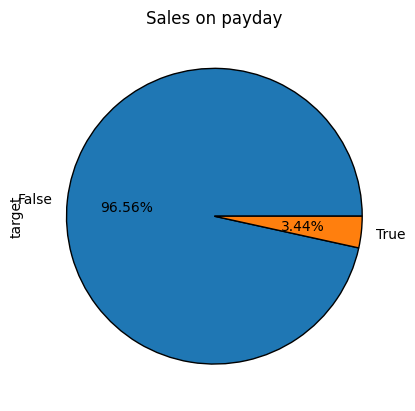

In [237]:
payday_sales = df_train.groupby("is_month_end")["target"].sum()
payday_sales.plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("Sales on payday")
plt.show()


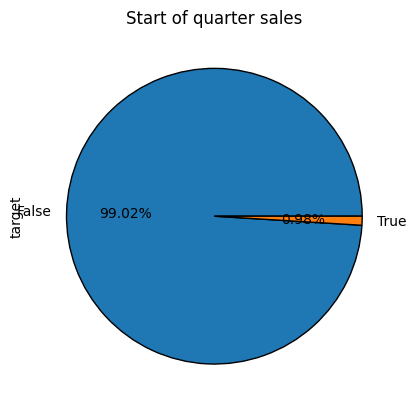

In [238]:
quaterly_start_sales = df_train.groupby("is_quarter_start")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("Start of quarter sales")
plt.show()

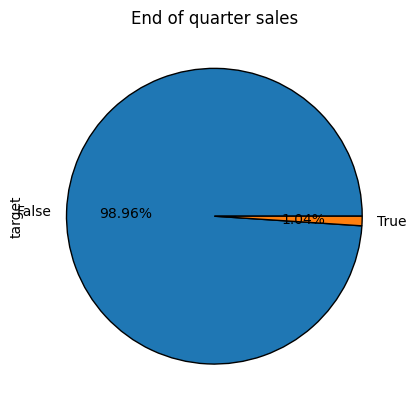

In [239]:
quarterly_end_sales = df_train.groupby("is_quarter_end")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("End of quarter sales")
plt.show()

### 6. Which shops recorded the highest sales and with what products?

In [240]:
highest_sales = df_train.groupby(["store_id", "category_id"], as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
highest_sales

,store_id,category_id,target
1317,store_45,category_7,1.287127e+07
1284,store_44,category_7,1.273035e+07
1383,store_47,category_7,1.221406e+07
1264,store_44,category_18,1.127058e+07
1350,store_46,category_7,1.120828e+07
756,store_3,category_7,1.018669e+07
1261,store_44,category_15,1.009036e+07
1416,store_48,category_7,1.006035e+07
1297,store_45,category_18,9.682288e+06
736,store_3,category_18,9.563545e+06


### 7. Are sales affected by holidays?

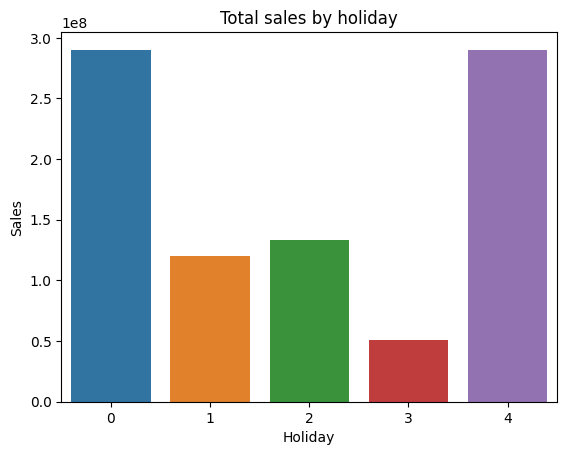

In [241]:
holiday_sales = df_train.groupby("type", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
sns.barplot(data=holiday_sales, x="type", y="target")
plt.ylabel("Sales")
plt.xlabel("Holiday")
plt.title("Total sales by holiday")
plt.show()

### 8. Which product category was promoted most and purchased most during promotion?

In [242]:
promo_product = df_train.groupby(["category_id", "onpromotion"], as_index=False)["target"].sum().sort_values(by= "onpromotion", ascending=False)
promo_product.head(10)

,category_id,onpromotion,target
1513,category_7,741,7517.0
1512,category_7,726,6044.0
1511,category_7,722,5846.0
1510,category_7,720,6154.0
1509,category_7,719,6681.0
1508,category_7,718,6712.0
1507,category_7,717,6262.0
1506,category_7,716,11401.0
1505,category_7,710,5948.0
1504,category_7,702,6825.0


### 9. Are product purchased affected by promotion?

In [243]:
promotions = df_train.groupby("category_id").apply(lambda x: x[x["onpromotion"] != 0]["target"].sum()).sort_values(ascending=False).reset_index().head(5)
no_promotions = df_train.groupby("category_id").apply(lambda x: x[x["onpromotion"] == 0]["target"].sum()).sort_values(ascending=False).reset_index().head(5)


In [244]:
no_promotions

,category_id,0
0,category_15,4.750057e+07
1,category_7,3.417183e+07
2,category_18,2.889701e+07
3,category_9,1.811096e+07
4,category_23,1.702796e+07


Text(0.5, 1.0, 'Sales of products with or without promotion')

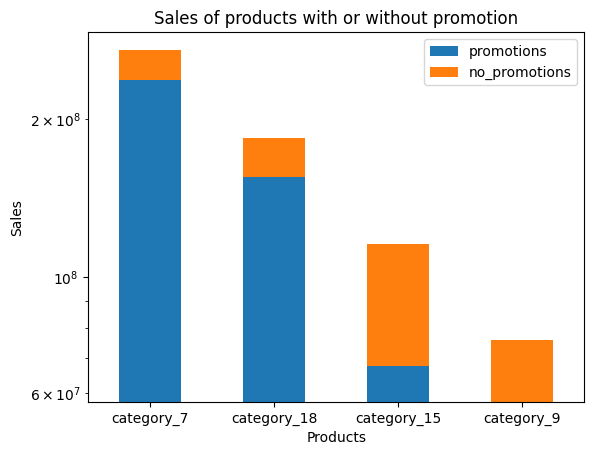

In [245]:
promo=pd.merge(promotions, no_promotions, on="category_id")

ax = promo.plot(kind='bar', stacked=True, x="category_id", logy=True, rot=0)
plt.legend(["promotions", "no_promotions"])
plt.ylabel("Sales")
plt.xlabel("Products")
plt.title("Sales of products with or without promotion")

### 10. Which day, month, and year recorded the highest promotion?

In [246]:
day_promo = df_train.groupby(["category_id", "onpromotion", "dayofweek", "month", "year"], as_index=False)["target"].sum().sort_values(by= "onpromotion", ascending=False)
day_promo.head(7)

,category_id,onpromotion,dayofweek,month,year,target
65716,category_7,741,Tues,May,2020,7517.0
65715,category_7,726,Sun,May,2020,6044.0
65714,category_7,722,Sat,May,2020,5846.0
65713,category_7,720,Sun,May,2020,6154.0
65712,category_7,719,Sun,May,2020,6681.0
65711,category_7,718,Sun,May,2020,6712.0
65710,category_7,717,Sat,May,2020,6262.0


In [247]:
df_train.columns

Index(['store_id', 'category_id', 'target', 'onpromotion',
       'nbr_of_transactions', 'city', 'type', 'cluster', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'year_weekofyear', 'Date'],
      dtype='object')

###  Assumptions for holidays type and store cities

Both holidays type and cities are ordinal numbers,it can be interpreted as an object format for better analysis and visualization.

We excluded the holiday dataset from merging because some of the dates were present in the train but absent in test. If we continue to use it will affect the test encoding and test prediction on submission since it will result in majority of the columns when encoding

In [248]:
# create names of cities
cities = {0:'Accra',1:'Kumasi',2:'Cape coast',3:'Tamale',
          4:'Tema',5:'Obuasi',6:'Koforidua',7:'Techiman',
          8:'Ho',9:'Teshie',10:'Gbawe',11:'Winneba',12:'Elmina,',
          13:'Kintampo',14:'Suhum',15:'Mampong',16:'Hohoe',
          17:'Akim Oda',18:'Aflao',19: 'Prestea',20:'Bekwai',21:'Akwatia'

}

df_train["city"] = df_train["city"].apply(lambda x: cities[x])
df_test["city"] = df_test["city"].apply(lambda x: cities[x])

In [249]:
df_train['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [250]:
df_test['dayofweek'].unique()

array(['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun'], dtype=object)

In [251]:
# After exploring the data, we reconvert the month and days into integers
month_d = {'month':{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}}
df_test.replace(month_d, inplace = True)

days = {'dayofweek':{'Mon':1, 'Tues':2, 'Weds':3, 'Thurs':4, 'Fri':5, 'Sat':6, 'Sun':7}}
df_test.replace(days, inplace = True)

month_d = {'month':{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}}
df_train.replace(month_d, inplace = True)

days = {'dayofweek':{'Mon':1, 'Tues':2, 'Weds':3, 'Thurs':4, 'Fri':5, 'Sat':6, 'Sun':7}}
df_train.replace(days, inplace = True)



In [252]:
df_train.head()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,store_1,category_24,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
1,store_1,category_21,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
2,store_1,category_32,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
3,store_1,category_18,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
4,store_1,category_26,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01


In [253]:
# Rename the store type
df_train = df_train.rename(columns={'type_x':'type'})
df_test = df_test.rename(columns={'type_x':'type'})

In [254]:
df_test.drop(columns=[ "date"], inplace=True)

In [255]:
df_test.shape, df_train.shape

((105138, 22), (2248884, 23))

In [256]:
# Combination of multiple columns to form single column in both train and test data
df_train['YW'] = 'year_week'
df_train['ID'] = df_train['YW']+'_'+df_train['year_weekofyear'].astype(str)+'_'+df_train['store_id']+'_'+df_train['category_id']


df_test['YW'] = 'year_week'
df_test['ID'] = df_test['YW']+'_'+df_test['year_weekofyear'].astype(str)+'_'+df_test['store_id']+'_'+df_test['category_id']


In [257]:
# Rename the test data to test
test = df_test

# Feature engineering

Impute Missing Values
first, lets have a quick overview before deciding how to handle missing value

In [258]:
# these columns will not be needed, it will be useful after applying log transformation
df_train.drop(columns=['ID','nbr_of_transactions','YW'], axis = 1, inplace=True)
test.drop(columns=['ID','YW','type_y'], axis = 1,inplace=True)

In [259]:
df_train.shape,test.shape

((2248884, 22), (105138, 21))

In [260]:
df_train.columns

Index(['store_id', 'category_id', 'target', 'onpromotion', 'city', 'type',
       'cluster', 'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'year_weekofyear', 'Date'],
      dtype='object')

In [261]:
test.columns

Index(['store_id', 'category_id', 'onpromotion', 'year', 'month', 'dayofmonth',
       'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'is_month_start',
       'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start',
       'is_year_end', 'year_weekofyear', 'Date', 'city', 'type', 'cluster'],
      dtype='object')

In [262]:
# convert the bolean values to 0 and 1
df_train = df_train.applymap(lambda x: int(x) if type(x)==bool else x)

test = df_test.applymap(lambda x: int(x) if type(x)==bool else x)

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [263]:
df_train.isnull().sum()

store_id            0
category_id         0
target              0
onpromotion         0
city                0
type                0
cluster             0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
Date                0
dtype: int64

In [264]:
test.isnull().sum()

store_id            0
category_id         0
onpromotion         0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
Date                0
city                0
type                0
cluster             0
dtype: int64

## Transformation

In [265]:
# Train data
df_train['store_id'] = df_train['store_id'].map(lambda x:x.split('_')[1]).astype(int)
df_train['category_id'] = df_train['category_id'].map(lambda x:x.split('_')[1]).astype(int)


# Test data
test['store_id'] = test['store_id'].map(lambda x:x.split('_')[1]).astype(int)
test['category_id'] = test['category_id'].map(lambda x:x.split('_')[1]).astype(int)


In [266]:
# Set date to index
df_train =df_train.set_index(['Date'])

df_t = test.set_index(['Date'])

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [267]:
# Code here
cols = [ 'city']
#calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
#setting output to DataFrame
encoder.set_output(transform="pandas")
Encoded_train = encoder.fit_transform(df_train[cols])
Encoded_test = encoder.fit_transform(df_t[cols])

In [268]:
# we dropped the categorical encoder column before we can concat
train_enc = df_train.drop(['city'],axis = 1)
test_enc = df_t.drop(['city',],axis = 1)

In [269]:
# join the train_enc,test_enc and Encoded train
train_data = pd.concat([train_enc, Encoded_train], axis=1)
test_data = pd.concat([test_enc, Encoded_test], axis=1)

In [270]:
#Checking shape after encoding
train_data.shape,test_data.shape

((2248884, 41), (105138, 40))

In [271]:
# Train partitioning
train,eval_1 = train_data[1692009:], train_data[:564003]

### Weekly Resampling

In [272]:
# Resample the train dataset
Resample = train.resample('W').mean()

In [273]:
# Rename the train
train = Resample
train.shape

(181, 41)

In [274]:
# Resample the evaluation dataset
eval_f = eval_1.resample('W').mean()

In [275]:
# machine learning dependent and independent f
X = train.drop(['target'], axis=1)
y = train['target']

### Data Splitting

In [276]:
# Split the dataframe into train and eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 40), (37, 40), (144,), (37,))

# Model Building

### 1. Randomforest

In [277]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

#model prediction
rf_pred = rf.predict(X_test)


In [278]:
mse = mean_squared_error(y_test, rf_pred )
rmse = np.sqrt(mean_squared_error(y_test, rf_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, rf_pred)).round(2)
msle = mean_squared_log_error(y_test, rf_pred).round(2)


results = pd.DataFrame([['Randomforest', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results

,Model,MSE,RMSE
0,Randomforest,4110.000786,64.11


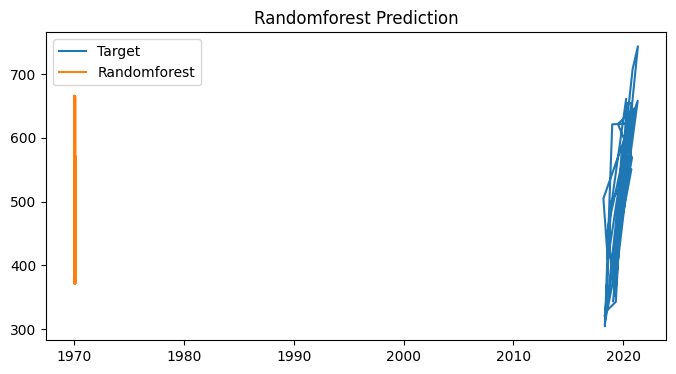

In [279]:
#graphical representation

plt.figure(figsize=(8,4))
plt.plot(y_test, label ='Target')
plt.plot(rf_pred, label='Randomforest')
plt.legend(loc='best')
plt.title('Randomforest Prediction')
plt.show()

### 2. Decision Tree

In [280]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

#Prediction
tree_pred = tree.predict(X_test)

In [281]:
mse = mean_squared_error(y_test, tree_pred )
rmse = np.sqrt(mean_squared_error(y_test, tree_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, tree_pred)).round(2)
msle = mean_squared_log_error(y_test, tree_pred).round(2)


m_results = pd.DataFrame([['Decision Tree', mse, rmse]], columns = ['Model', 'MSE', 'RMSE',])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.000786,64.11
1,Decision Tree,2698.499848,51.95


<BarContainer object of 40 artists>

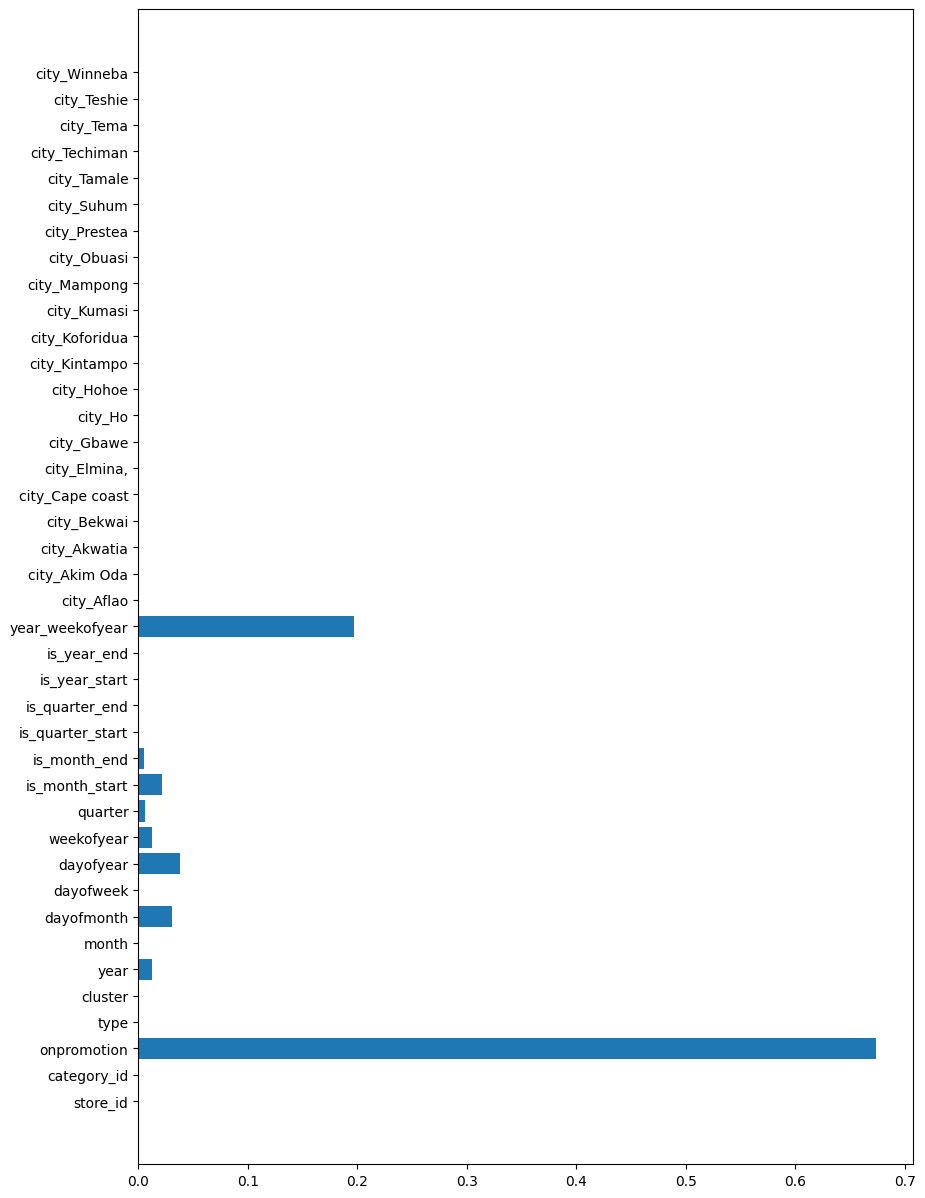

In [282]:
# feature importance for decision tree

plt.figure(figsize=(10,15))
plt.barh(X.columns, tree.feature_importances_)

### 3.XGboost

In [283]:
# fit model no training data
boost = XGBRegressor()
boost.fit(X_train, y_train)

# make predictions for test data
boost_pred = boost.predict(X_test)

In [284]:
mse = mean_squared_error(y_test, boost_pred )
rmse = np.sqrt(mean_squared_error(y_test, boost_pred )).round(2)


m_results = pd.DataFrame([['XGBOOST', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.000786,64.11
1,Decision Tree,2698.499848,51.95
2,XGBOOST,1714.572183,41.41


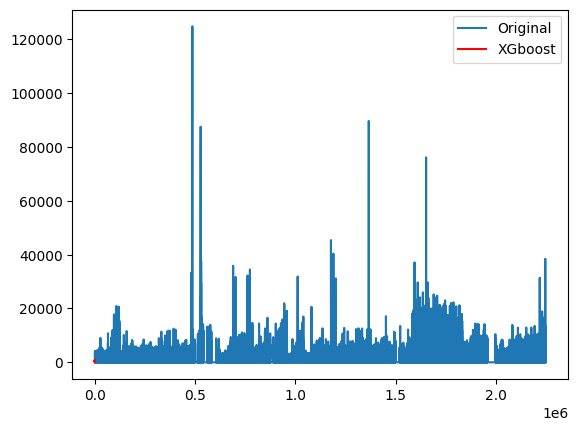

In [285]:
# Graphical Representation

plt.plot(train_data.target.values, label='Original')
plt.plot(boost_pred, color='red', label='XGboost')
plt.legend()

### 4. KNN

In [286]:
neigh = KNeighborsRegressor(n_neighbors=2)
# fit model no training data
neigh.fit(X_train, y_train)

# make predictions for test data
neigh_pred = neigh.predict(X_test)



In [287]:
mse = mean_squared_error(y_test, neigh_pred )
rmse = np.sqrt(mean_squared_error(y_test, neigh_pred )).round(2)


m_results = pd.DataFrame([['KNN', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.000786,64.11
1,Decision Tree,2698.499848,51.95
2,XGBOOST,1714.572183,41.41
3,KNN,2493.398127,49.93


## Back testing testing to see how the model performs

# XGBOOST

In [288]:
backtests = {
    1: ('2018-02-01', '2018-02-16'),
    2: ('2019-09-15', '2019-09-29'),
    3: ('2020-08-01', '2020-08-15'),
}

In [289]:
# Backtests with XGBOOST
scores = {}

for idx, period in enumerate(backtests):

    _train = train.reset_index()[train.reset_index()['Date'] < backtests[period][0]]
    _test = train.reset_index()[(train.reset_index()['Date'] >= backtests[period][0]) & (train.reset_index()['Date'] <= backtests[period][1])]

    Xtrain, ytrain = _train.set_index(['Date']).drop(columns=['target']).values, _train.target.values
    Xtest, ytest = _test.set_index(['Date']).drop(columns=['target']).values, _test.target.values

    boost_model = XGBRegressor().fit(Xtrain, ytrain)

    ypred = boost_model.predict(Xtest)

    scores[period] = np.sqrt(mean_squared_log_error(ytest, ypred))

print(scores)

{1: 0.3381455842224953, 2: 0.04024527847530671, 3: 0.010147302959795212}


# Validation on XGBOOST

In [290]:
# Split the data into parts
x = eval_f.drop(['target'],axis = 1)
y = eval_f['target']

In [291]:
# predictions on x
boost_p = boost.predict(x)

In [292]:
# Scores output
mse = mean_squared_error(y, boost_p )
rmse = np.sqrt(mean_squared_error(y, boost_p )).round(2)


m_results = pd.DataFrame([['XGBOOST', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
m_results

,Model,MSE,RMSE
0,XGBOOST,57018.83645,238.79


### The model underfits the validation set with RMSE

# TIME SERIES MODELS

## 1. Autoregression (AR)

In [293]:
x=train['target']
X_train, X_test = x[:30], x[30:]
print(len(X_train), len(X_test))

30 151


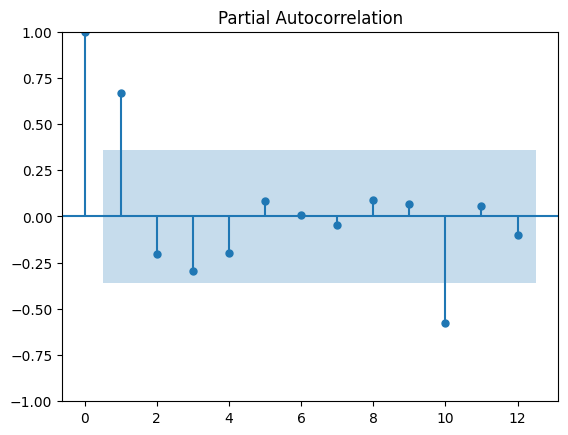

In [294]:
pacf = plot_pacf(X_train,lags = 12)

In [295]:
armodel = AutoReg(X_train, lags = 9).fit()

In [296]:
pred = armodel.predict(
    start=len(X_train),
    end=len(x)-1,
    dynamic=False
)
pred

2018-08-05    388.050269
2018-08-12    372.979414
2018-08-19    337.782704
2018-08-26    333.655932
2018-09-02    319.614807
                 ...    
2021-05-23    379.644926
2021-05-30    379.644918
2021-06-06    379.644894
2021-06-13    379.644864
2021-06-20    379.644837
Freq: W-SUN, Length: 151, dtype: float64

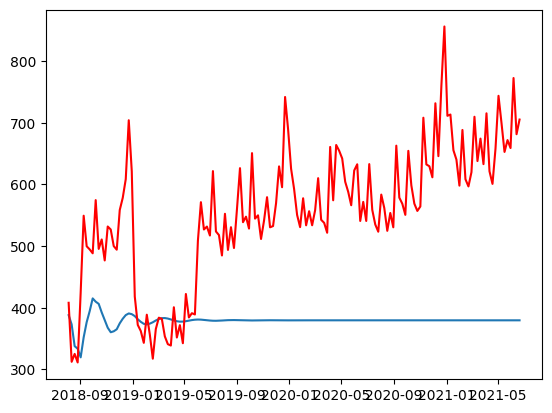

In [297]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(X_test, color='red')

In [298]:
# AR Predictions scores

mse = mean_squared_error(X_test, pred )
msle = mean_squared_log_error(X_test, pred)
rmse = np.sqrt(mean_squared_error(X_test, pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, pred)).round(5)

results = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results


,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.0,0.41532


## 2. SARIMA

In [299]:
# Fitting the model
model = SARIMAX(X_train, order=(5, 1, 5), seasonal_order=(0,0,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                   30
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -157.236
Date:                Fri, 30 Jun 2023   AIC                            336.473
Time:                        09:13:53   BIC                            351.513
Sample:                    01-07-2018   HQIC                           341.183
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6312      1.259     -0.501      0.616      -3.099       1.837
ar.L2          0.1422      1.086      0.131      0.896      -1.987       2.271
ar.L3          0.5606      0.618      0.908      0.364      -0.650       1.771
ar.L4         -0.0397      0.706     -0.056      0.955      -1.423       1.344
ar.L5         -0.5419      0.625     -0.867      0.386      -1.767       0.683
ma.L1          0.5302     94.936      0.006      0.996    -185.541     186.601
ma.L2         -0.5164    138.899     -0.004      0.997    -272.753     271.720
ma.L3         -1.0317    150.935     -0.007      0.995    -296.858     294.795
ma.L4         -0.4802    116.016     -0.004      0.997    -227.867     226.907
ma.L5          0.5003     74.355      0.007      0.995    -145.233     146.234
sigma2      2447.7289   3.62e+05      0.007      0.995   -7.07e+05    7.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.46
Prob(Q):                              0.71   Prob(JB):                         0.11
Heteroskedasticity (H):               1.68   Skew:                             0.86
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [300]:
# Make predictions on the test data
SARIMA_pred = model_fit.predict(
    start=len(X_train),
    end=len(x)-1,
    typ="levels")
SARIMA_pred

2018-08-05    373.761453
2018-08-12    372.586734
2018-08-19    367.503870
2018-08-26    348.701790
2018-09-02    371.355391
                 ...    
2021-05-23    390.952118
2021-05-30    393.345571
2021-06-06    388.952049
2021-06-13    391.481141
2021-06-20    392.963937
Freq: W-SUN, Name: predicted_mean, Length: 151, dtype: float64

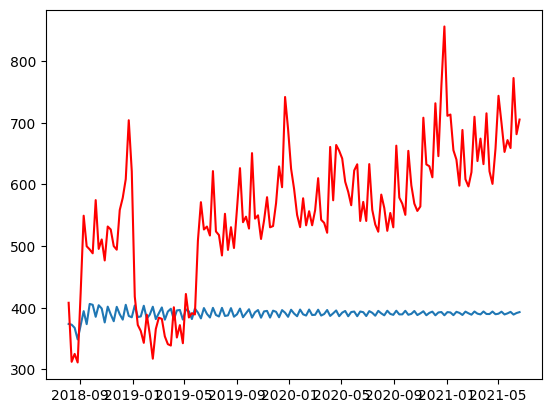

In [301]:
pyplot.plot(SARIMA_pred)
pyplot.plot(X_test, color='red')

In [302]:
# SARIMA Prediction Scores
# Evaluate our models
mse = mean_squared_error(X_test, SARIMA_pred)
msle = mean_squared_log_error(X_test, SARIMA_pred)
rmse = np.sqrt(mean_squared_error(X_test, SARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, SARIMA_pred)).round(2)

model_results = pd.DataFrame([['SARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.00,0.41532
1,SARIMA,38632.638005,0.152432,196.55,0.39000


## 3. ARIMA

In [303]:
stepwise_fit = auto_arima(X_train, trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=338.012, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=349.730, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=334.335, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=338.738, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=446.999, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=335.533, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=335.865, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=338.115, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.399 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -164.167
Date:                Fri, 30 Jun 2023   AIC                            334.335
Time:                        09:13:54   BIC                            338.538
Sample:                    01-07-2018   HQIC                           335.680
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    133.9488     80.507      1.664      0.096     -23.843     291.740
ar.L1          0.6693      0.201      3.322      0.001       0.274       1.064
sigma2      3251.8909    843.921      3.853      0.000    1597.836    4905.945
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 6.84
Prob(Q):                              0.57   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                             0.96
Prob(H) (two-sided):                  0.90   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
model = ARIMA(X_train, order=(5,1,4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                   30
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -157.700
Date:                Fri, 30 Jun 2023   AIC                            335.400
Time:                        09:13:54   BIC                            349.073
Sample:                    01-07-2018   HQIC                           339.682
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0233      0.633     -1.617      0.106      -2.264       0.217
ar.L2         -0.3245      0.602     -0.539      0.590      -1.504       0.855
ar.L3          0.3767      0.420      0.898      0.369      -0.446       1.199
ar.L4          0.2309      0.528      0.437      0.662      -0.804       1.266
ar.L5         -0.2502      0.411     -0.608      0.543      -1.056       0.556
ma.L1          0.9662   1340.415      0.001      0.999   -2626.199    2628.132
ma.L2         -0.0021   1297.862  -1.61e-06      1.000   -2543.765    2543.761
ma.L3         -0.9662   1336.838     -0.001      0.999   -2621.121    2619.189
ma.L4         -0.9979      0.616     -1.619      0.105      -2.206       0.210
sigma2      2507.1997      2.599    964.803      0.000    2502.106    2512.293
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.73   Prob(JB):                         0.29
Heteroskedasticity (H):               1.49   Skew:                             0.68
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.17e+21. Standard errors may be unstable.
"""

In [305]:
# Make predictions on the test data
ARIMA_pred = model_fit.predict(
    start=len(X_train),
    end=len(x)-1,
    typ="levels")
ARIMA_pred

2018-08-05    387.892078
2018-08-12    399.659339
2018-08-19    398.461897
2018-08-26    383.722273
2018-09-02    396.463231
                 ...    
2021-05-23    397.662429
2021-05-30    397.837626
2021-06-06    397.702422
2021-06-13    397.683979
2021-06-20    397.830173
Freq: W-SUN, Name: predicted_mean, Length: 151, dtype: float64

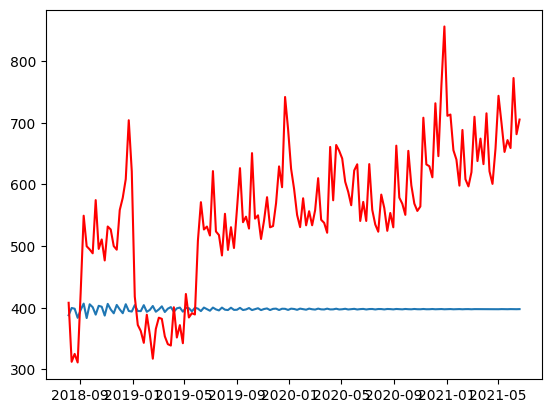

In [306]:
pyplot.plot(ARIMA_pred)
pyplot.plot(X_test, color='red')

In [307]:
# ARIMA Prediction Scores

mse = mean_squared_error(X_test, ARIMA_pred)
msle = mean_squared_log_error(X_test, ARIMA_pred)
rmse = np.sqrt(mean_squared_error(X_test, ARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, ARIMA_pred)).round(2)

model_results = pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.00,0.41532
1,SARIMA,38632.638005,0.152432,196.55,0.39000
2,ARIMA,36536.844620,0.141957,191.15,0.38000


## The model with the best RMSE score is the XGBRegressor

## The time series best model was ARIMA model and is selected for our prediction

# Test_Prediction and submission

In [308]:
test = test_data.values

In [309]:
# Predictions on the test_data
prediction = boost.predict(test)

In [310]:
df_test['target'] = prediction

In [311]:
df_test['ID'] = range(len(df_test))


In [312]:
submission = df_test[['ID', 'target']]

In [313]:
# overview of submission Test
submission.head()

,ID,target
0,0,472.197327
1,1,472.197327
2,2,472.197327
3,3,548.178589
4,4,472.197327


In [314]:
# prediction over all ID by their total.

t = submission.groupby('ID')['target'].sum().reset_index()
prediction_sub = submission.merge(t, on='ID').rename(columns={'target_y':'target'}).drop('target_x', axis=1)

# Log transformation on prediction

In [315]:
prediction_sub['target'] = np.log1p(abs(prediction_sub['target']))

In [316]:
# Save sample submission
submission_directory = os.path.abspath(os.path.join(os.getcwd(), '..', 'datasets', 'csv transformation'))
submission_file = os.path.join(submission_directory, 'Sample Submission.csv')

prediction_sub.to_csv('/content/drive/MyDrive/capstone/SampleSubmission 1.csv', index=False)

### Creating a dictionary of objects to export

In [317]:
cluster_ = train_data['cluster'].unique().tolist()
type_ = train_data['type'].unique().tolist()
cities = df_train['city'].unique().tolist()
features_ = boost.get_booster().feature_names

In [318]:
exports = {"OneHotEncoder": encoder,
           "model": boost,
          "cities": cities,
          "type": type_,
          'cluster': cluster_}

# Exporting the dictionary with Pickle
with open("toolkit_folder", "wb") as file:
    pickle.dump(exports, file)

In [319]:
# Update the file path on Google Drive
directory = '/content/src/assets/ml_components'
filename = f'{directory}/toolkit_folder'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Perform operations with the file
exports = exports = {"OneHotEncoder": encoder,
           "model": boost,
          "cities": cities,
          "type": type_,
          'cluster': cluster_}

# Export the dictionary with Pickle
with open(filename, "wb") as file:
    pickle.dump(exports, file)


###**Streamlit App**

In [320]:
!pip install streamlit

In [321]:
%%writefile app.py

# Loading key libraries
import streamlit as st
import os
import pickle
import numpy as np
import pandas as pd
import re
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns




# Setting the page configurations
st.set_page_config(page_title= "Prediction Forecasting", layout= "wide", initial_sidebar_state= "auto")

# Setting the page title
st.title("Grocery Store Forecasting Prediction")

# Load the saved data
df = pd.read_csv('/content/drive/MyDrive/capstone/Grocery.csv')


toolkit = "/content/toolkit_folder"
@st.cache_resource
def load_toolkit(filepath = toolkit):
    with open(toolkit, "rb") as file:
        loaded_toolkit = pickle.load(file)
    return loaded_toolkit


toolkit = load_toolkit()
Encoder = toolkit["OneHotEncoder"]
model = toolkit["model"]



# main sections of the app
menu = st.sidebar.radio('menu',['Home view','Prediction target'])

if menu == 'Home view':
      st.write('Grocery Store Time Series Forecasting')
      st.image('/content/drive/MyDrive/capstone/images1.jpg',width = 450)
      st.write('Graphical representation and Data Overview')
      if st.checkbox('Data Set '):
            st.table(df.head(15))
st.title('Charts')
graph = st.selectbox('Varieties of graphs',['scatter plot','Bar chat','Histogram'])
if graph == 'scatter plot':
      fig,ax = plt.subplots(figsize=(10,5))
      sns.scatterplot(y = 'target',x = 'onpromotion',data = df.iloc[:1000],palette = 'bright',hue = 'city');
      st.pyplot(fig)

if graph == 'Bar chat':
       fig,ax = plt.subplots(figsize=(10,5))
       t = df.groupby("city")["target"].sum().reset_index().sort_values(by="target",ascending=False).iloc[:10]
       sns.barplot(data=t[:20] , y="target", x="city", palette='Blues_d')
       st.pyplot(fig)

if graph == 'Histogram':
        fig,ax = plt.subplots(figsize=(10,5))
        st.write('Target Categories')
        sns.distplot(df.target.iloc[:20], kde=True)
        st.pyplot(fig)





if menu == 'Prediction target':
    st.image('image 2.jpg', width = 460)

    st.sidebar.markdown('User Input Details and Information')

    store_id= st.sidebar.selectbox('store_id', options = sorted(list(df['store_id'].unique())))
    category_id= st.sidebar.selectbox('categegory_id',options = sorted(list(df['category_id'].unique())))
    onpromotion= st.sidebar.number_input('onpromotion', min_value= df["onpromotion"].min(), value= df["onpromotion"].min())
    year = st.sidebar.selectbox('year', options = sorted(list(df['year'].unique())))
    month = st.sidebar.selectbox('month', options = sorted(list(df['month'].unique())))
    dayofmonth= st.sidebar.number_input('dayofmonth', min_value= df["dayofmonth"].min(), value= df["dayofmonth"].min())
    dayofweek = st.sidebar.number_input('dayofweek', min_value= df["dayofweek"].min(), value= df["dayofweek"].min())
    dayofyear = st.sidebar.number_input('dayofyear', min_value= df["dayofyear"].min(), value= df["dayofyear"].min())
    weekofyear = st.sidebar.number_input('weekofyear', min_value= df["weekofyear"].min(), value= df["weekofyear"].min())
    quarter  = st.sidebar.number_input('quarter', min_value= df["quarter"].min(), value= df["quarter"].min())
    is_month_start = st.sidebar.number_input('is_month_start', min_value= df["is_month_start"].min(), value= df["is_month_start"].min())
    is_month_end = st.sidebar.number_input('is_month_end', min_value= df["is_month_end"].min(), value= df["is_month_end"].min())
    is_quarter_start = st.sidebar.number_input('is_quarter_start', min_value= df["is_quarter_start"].min(), value= df["is_quarter_start"].min())
    is_quarter_end = st.sidebar.number_input('is_quarter_end', min_value= df["is_quarter_end"].min(), value= df["is_quarter_end"].min())
    is_year_start = st.sidebar.number_input('is_year_start', min_value= df["is_year_start"].min(), value= df["is_year_start"].min())
    is_year_end = st.sidebar.number_input('is_year_end', min_value= df["is_year_end"].min(), value= df["is_year_end"].min())
    year_weekofyear = st.sidebar.number_input('year_weekofyear', min_value= df["year_weekofyear"].min(), value= df["year_weekofyear"].min())
    city =  st.sidebar.selectbox("city:", options= sorted(set(df["city"])))
    store_type=  st.sidebar.number_input('type', min_value= df["type"].min(), value= df["type"].min())
    cluster = st.sidebar.selectbox('cluster', options = sorted(list(df['cluster'].unique())))



    input_df = {
            'store_id':[store_id],
            'category_id':[category_id],
            'onpromotion' :[onpromotion],
            'year' : [year],
            'month' :[month],
            'dayofmonth' :[dayofmonth],
            'dayofweek' : [dayofweek],
            'dayofyear' : [dayofyear],
            'weekofyear' : weekofyear,
            'quarter' : [quarter],
            'is_month_start' : [is_month_start],
            'is_month_end' : [is_month_start],
            'is_quarter_start' : [is_quarter_start],
            'is_quarter_end' : [is_quarter_end],
            'is_year_start' : [is_year_start],
            'is_year_end' : [is_year_end],
            'year_weekofyear' : [year_weekofyear],
            'city' : [city],
            'type' : [store_type],
            'cluster': [cluster]
}

 # Put the input dictionary in a dataset
    input_data = pd.DataFrame(input_df)



# defining categories and numeric columns

    col = ['city']
    columns = list(input_data.columns)
    encoded_cat = Encoder.transform(input_data[col])
    encoded_cols = Encoder.get_feature_names()
    encoded_cat_ = pd.DataFrame(encoded_cat, columns=encoded_cols)



    # we dropped the categorical encoder column before we concat
    train_enc = input_data.drop(['city'],axis = 1)
    input_d = pd.concat([train_enc, encoded_cat_], axis=1)

    # convert input_data to a numpy array before flattening to convert it back to a 2D array
    input_df= input_d.to_numpy()
    prediction = model.predict(input_df.flatten().reshape(1, -1))


    if st.button('Predict'):
               st.success('The predicted target is ' + str(round(prediction[0],2)))


Overwriting app.py


In [322]:
!curl -fsSL https://get.docker.com -o get-docker.sh
!sh get-docker.sh

# Executing docker install script, commit: c2de0811708b6d9015ed1a2c80f02c9b70c8ce7b
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq apt-transport-https ca-certificates curl >/dev/null
+ sh -c install -m 0755 -d /etc/apt/keyrings
+ sh -c curl -fsSL "https://download.docker.com/linux/ubuntu/gpg" | gpg --dearmor --yes -o /etc/apt/keyrings/docker.gpg
+ sh -c chmod a+r /etc/apt/keyrings/docker.gpg
+ sh -c echo "deb [arch=amd64 signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu focal stable" > /etc/apt/sources.list.d/docker.list
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq docker-ce docker-ce-cli containerd.io docker-compose-plugin docker-ce-rootless-extras docker-buildx-plugin >/dev/null


To run Docker as a non-privileged user, consider setting up the
Docker daemon in rootless mode for your user:

    dockerd-rootless-setuptool.sh install

Visit https://d

In [323]:
%%writefile requirements.txt
matplotlib==3.3.4
numpy==1.22.4
pandas==1.2.4
pmdarima==2.0.3
scipy==1.6.2
seaborn==0.11.1
scikit-learn==0.24.1
xgboost==1.7.3
streamlit==1.23.1

Writing requirements.txt


In [325]:
%%writefile Dockerfile
FROM python:3.9


WORKDIR /code

# Create a writable directory for the cache
RUN mkdir -p /.cache/huggingface/hub && chmod -R 777 /.cache

# Set the TRANSFORMERS_CACHE environment variable
ENV TRANSFORMERS_CACHE /.cache/huggingface/hub


COPY ./requirements.txt /code/requirements.txt

RUN pip3 install --upgrade pip

RUN pip3 install -r requirements.txt

COPY . .

CMD ["streamlit","run","/content/app.py", "--server.address", "0.0.0.0", "--server.port", "7860", "--browser.serverAddress", "achar-Docker.hf.space", "--browser.serverAddress","0.0.0.0:7860"]



Overwriting Dockerfile
